# Import packages

In [2]:
import pandas as pd
from  tqdm import tqdm
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from collections import OrderedDict
import seaborn
from datetime import datetime
from matplotlib.pyplot import figure

Write **./"SageMaker/import_data.sh"** in the terminal in order to download all the datasets.

# RQ1

### Exploratory data analysis of instagram_profiles dataset 

In [7]:
profiles=pd.read_csv("~/instagram_profiles.csv",delimiter="\t")
profiles.head(1) #quick overview of the dataset

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False


In [ ]:
#we can check with "is_unique" if every profile_id is unique in the dataset
print(profiles.profile_id.is_unique)
profiles.shape


False


(4509586, 11)

As we can see there are duplicates in the profile_id column.

Then we can drop all of them and keep only the first occurency.

In [ ]:
profiles.drop_duplicates(subset='profile_id',keep='first',inplace=True)
print(profiles.profile_id.is_unique)
profiles.shape

True


(4475706, 11)

The next step is to drop all the Nan values in the profile_id columns.

In [ ]:
profiles.dropna(subset=['profile_id'],inplace=True)
profiles.shape

(4475705, 11)

The instagram_profiles dataset contains 4475705 different profiles.

The dataset is made up of 11 columns:


| Variables | Type |
| :-: | :-: |
| sid | int64 |  
| profile_id           |float64 |  
|  profile_name        | object |  
| firstname_lastname   | object | 
|description           |object  |
|following             |float64 |
|followers             |float64 |
|n_posts               |float64 |
|url                   |object  |
|cts                   |object  |
|is_business_account   |object  |

After the overview that concerns the shapes of the dataset we can now move on to a decriptive analysis of the variables 'following', 'followers' and 'n_posts'. We choose to analyse only those 3 variables because they are quantitative and they give us some relevant informations. 

In [ ]:
profiles.following.describe().apply(lambda x: '%.2f' % x)

count    3446893.00
mean        1405.83
std         8120.11
min            0.00
25%          356.00
50%          754.00
75%         1573.00
max      4191080.00
Name: following, dtype: object

In [ ]:
profiles.followers.describe().apply(lambda x: '%.2f' % x)

count      3446893.00
mean          4744.66
std         194071.17
min              0.00
25%            159.00
50%            406.00
75%            974.00
max      285457645.00
Name: followers, dtype: object

In [ ]:
profiles.n_posts.describe().apply(lambda x: '%.2f' % x)

count    3446893.00
mean         409.58
std         1042.07
min            0.00
25%           22.00
50%          120.00
75%          420.00
max       183730.00
Name: n_posts, dtype: object

### Let's now analyse instagram_locations dataset

In [ ]:
locations=pd.read_csv("~/instagram_locations.csv",delimiter="\t")
locations.head(1)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987


In [ ]:
#In this case we can check if every id is unique in the locations dataset with the following code:
locations.id.is_unique

True

Differently from instagram_profiles, here we have uniqueness in the id variable.
So we can now compute the shape of the dataset.

In [ ]:
print('Number of locations without duplicates:',locations.shape[0])

Number of locations without duplicates: 1022658


The instagram_locations dataset contains 1022658 different locations.

The dataset is made up of 23 columns: 

| Variables | Type | 
|:-|-:| 
|sid|                         int64|
|id|                          int64|
|name|                       object|
|street|                     object|
|zip|                        object|
|city|                       object|
|region|                     object|
|cd|                         object|
|phone|                      object|
|aj_exact_city_match|        object|
|aj_exact_country_match|     object|
|blurb|                      object|
|dir_city_id|                object|
|dir_city_name|              object|
|dir_city_slug|              object|
|dir_country_id|             object|
|dir_country_name|           object|
|lat|                       float64|
|lng|                       float64|
|primary_alias_on_fb|        object|
|slug|                       object|
|website|                    object|
|cts|                        object|

After the overview that concerns the shapes of the dataset in this case we think it's not usefull to give a descriptive overview of any variables.

In [ ]:
posts_1row=pd.read_csv("~/instagram_posts.csv",nrows=1, delimiter="\t")
posts_1row

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0


Now we move on with a short analysis of instagram_posts dataset.

The dataset is made up of 10 columns:

| Variables | Type | 
| :-: | :-: | 
| sid | int64 |
| sid_profile | int64 |
| post_id | object |
| profile_id | int64 |
| location_id | int64 |
| cts | object |
| post_type | int64 |
| description | object |
| numbr_likes | int64 |
| number_comments | int64 |


After the overview that concerns the shapes of the dataset we can now move on to a descriptive analysis of the variables 'numbr_likes', 'number_comments'. An another variable that could be interesting to analyse is 'post_type' but we'll see that later in the homework so we've decided to skip it for now. 

In [ ]:
#In order to find the mean, the minimum and the maximum of number_comments and numbr_likes we've chosen to work with subsets
#of the whole dataset. 
#Regarding the minimum and the maximum values of those variables, for every subsets we store the minimum and the maximum 
#of the subset into a list and at the end we take the minimum and the maximum of those lists.

#For the mean we've found the mean of every subsets and then we've computed the mean of the means.

minlike=[] 
maxlike=[]
meanl=[]

mincomm=[]
maxcomm=[]
meanc=[]

for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",usecols=["numbr_likes","number_comments"],chunksize=500000, delimiter="\t")):
   
    meanl.append(float(chunk.numbr_likes.mean()))
    minlike.append(float(chunk.numbr_likes.min()))
    maxlike.append(float(chunk.numbr_likes.max()))

    meanc.append(float(chunk.number_comments.mean()))
    mincomm.append(float(chunk.number_comments.min()))
    maxcomm.append(float(chunk.number_comments.max()))

    
l=len( meanl)
c=len( meanc)

totl=sum(meanl)
totc=sum(meanc)

al=round(totl/l,2)
ac=round(totc/c,2)
print("Mean", "Min","Max")
print(al,min(minlike),max(maxlike)) 
print(ac,min(mincomm),max(maxcomm))

86it [01:35,  1.11s/it]

Mean Min Max
283.71 0.0 8822952.0
7.59 0.0 488953.0


We can summarise the output of the previous code in the following table:

| |Likes| Comments|
|:- | -:| -:|
|**Mean**| 283.71| 7.59|
|**Min** | 0.0| 0.0|
|**Max**| 8822952.0| 488953.0|


#  RQ2 
Let's explore the dataset by finding simple insights regarding the profile and posts.

## RQ2.1 
Plot the number of posts for each profile in descending order.

In [ ]:
profiles.sort_values(by="n_posts",ascending=False).head(10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,117099.0,NaN,NaN,False
4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,113780.0,bit.ly/2GdIYJl,2019-07-14 21:10:30.785 -0400,True
4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,113182.0,bit.ly/2asesw7,2019-07-13 02:08:17.407 -0400,True
4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,112777.0,bit.ly/2T2RIqG,2019-07-13 09:28:30.025 -0400,True
1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,112723.0,www.flightclub.com/yeezy,2019-04-01 02:41:26.980 -0400,False


## RQ2.2 
What posts have the highest number of "likes"?

In [ ]:
#Inizializate the df_like dataset.
df_like= pd.DataFrame(columns=["profile_id","numbr_likes"]) # Inizializate the df_like dataset.

#We take the first 10 posts for number of likes of every subdataset
top_n=10
#After that we merge them together in order to understand which post have the most number of likes.
#Since we take only 10 posts with highiest number of likes, we can only be sure about the top ten  of the final dataset.
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["profile_id","numbr_likes"], delimiter="\t")):
    df_like=pd.concat([df_like,chunk.sort_values(by="numbr_likes",ascending=False).head(top_n)])

86it [01:35,  1.11s/it]


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # This line remove the scientific notation
df_like.sort_values(by="numbr_likes",ascending=False).head(top_n)

,profile_id,numbr_likes
19624085,49067778.00,8822952.00
19623988,49067778.00,5447066.00
19624082,49067778.00,5116398.00
19623986,49067778.00,4271466.00
39701024,427553890.00,4264745
6293907,1518284433,3586546
19624086,49067778.00,3558599.00
19802016,2153680783.00,3533326.00
30850564,20315007.00,3340297
39812576,35306961.00,3311246


## RQ2.3
What posts have the most and the least number of comments?

In [ ]:
df_comments= pd.DataFrame(columns=["profile_id","number_comments"])

#We take the first 10 posts for number of comments of every subdataset
#We take last 10 posts for number of comments of every subdataset.
top_n=10

#After that we merge them together in order to understand which post have most and least comment.
#Since we take only 10 posts with highiest number of comment and 10 posts with lower number of comment for each subset
#We can only be sure about the top ten and the bottom ten of the final dataset.
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["profile_id","number_comments"], delimiter="\t")):
    df_comments=pd.concat([df_comments,chunk.sort_values(by="number_comments",ascending=False).head(top_n)])
    df_comments=pd.concat([df_comments,chunk.sort_values(by="number_comments").head(top_n)])


86it [01:35,  1.11s/it]


In [ ]:
df_comments.sort_values(by="number_comments",ascending=False).head(top_n) #Top 10

,profile_id,number_comments
41873060,1635669992,488953
12164781,428299385.00,313997
33261751,55336452.00,257488
11149127,5697152.00,214365
9383817,1062916389.00,189888
5427268,144094924,180635
25257169,16668152.00,173988
6220011,179780704,170836
31689573,6760538.00,166919
14257307,195941768.00,166198


In [ ]:
df_comments.sort_values(by="number_comments").head(top_n)                 #Bottom 10

,profile_id,number_comments
21157738,176389796.00,0
23127129,523007545.00,0
23127130,523007545.00,0
23268702,4921761031.00,0
23749999,4537782929.00,0
23755000,10010241785.00,0
23755003,10010241785.00,0
23755006,10010241785.00,0
23755008,5803519446.00,0
23755018,24169919.00,0


### RQ2.4
How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [ ]:
NO_tag_location,tot=0,0
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["location_id"],delimiter="\t")):
    NO_tag_location += chunk.location_id.isna().sum()
    tot += chunk.shape[0]

86it [01:34,  1.10s/it]


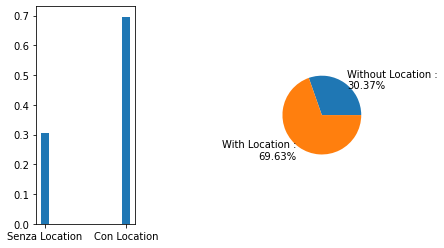

In [ ]:
fig = plt.figure() #set figure
labs = ['Senza Location', "Con Location"]                  #Creating labs
valori = [NO_tag_location/tot,(tot-NO_tag_location)/tot]   #Values



plt.subplot(1,3,1)  #set first subplot 
plt.bar(labs,valori,width=0.1)  #barplot

plt.subplot(1,3,3) #set second subplot
plt.pie(valori,labels=['Without Location :\n'+str(round(NO_tag_location/tot*100,2))+"%", "With Location :\n"+str(round((tot-NO_tag_location)/tot*100,2))+"%"]) #pieplot

plt.show() 

30.4 % of posts without location and 69.6 % with location.
So the majority of the users include locations in their posts.

### RQ2.5
How many posts include only photos? How many also have videos?

In [ ]:
#We initialize a pandas series, after that we iterate.
#For every loop we find the frequency of posts with photos, videos and both and we add it to our initializated series.
type_post = pd.Series([0,0,0],index=[1, 2, 3])
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["post_type"], delimiter="\t")):
    type_post = type_post.add(chunk.post_type.value_counts(),fill_value=0)

86it [01:35,  1.11s/it]


### Percentual frequency table

In [ ]:
type_post=type_post.astype(int)
type_post=pd.Series(list(type_post),index=["Only photo","Only video","Multy"])
round(type_post/sum(type_post)*100,2)

Only photo   97.25
Only video    2.66
Multy         0.10
dtype: float64

### Plot

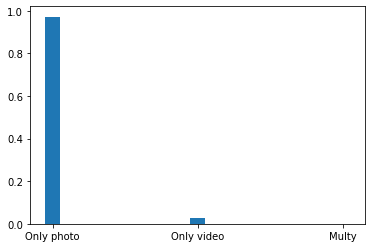

In [ ]:
#type_post=[41534486,1134768,40943]
#fig = plt.figure() #set figure
tot=sum(type_post)
labs = ['Only photo', "Only video","Multy"]                  #Creating labs
valori=np.array(type_post) /  tot                            #Values

plt.bar(labs,valori,width=0.1)  #barplot

plt.show() 

As  we can see from the barplot and the frequency table  97% of the posts include only photo.   
Then 2.66 % include only video.  
There are very few post that have both (0.10%)  .


### RQ2.6
What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [ ]:
#We drop the profiles that do not have a specific account type.
profiles.dropna(subset=["is_business_account"],inplace=True)
business=profiles.is_business_account.value_counts()/profiles.shape[0]*100
business.rename({False: "Not business", True: "Business"})

Not business   75.18
Business       24.82
Name: is_business_account, dtype: float64

As we can see most of the profiles aren't business account.

# RQ3
What is the most common time in which users publish their posts?

We have to focus on the variabile "cts".  

The first thing that we have to is bring this variable in **datetime** format.

In [ ]:
from datetime import datetime
import re
from collections import Counter
from matplotlib.pyplot import figure


def time_interval(interval):
    conta=Counter()
    
    #Inizialization of the counter, this is done in order to have a sorted plot by interval
    for a in range(0,len(interval)):
        conta[interval[a]] += 0

    
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",usecols=["cts"],chunksize=250000, delimiter="\t")):
        chunk.cts=pd.to_datetime(chunk.cts)

        for oss in chunk.cts.dt.time :
            try:
                oss=oss.strftime('%H:%M:%S')
 
                for j in range(0,len(interval)):
                    intervalli=re.findall(r"[0-9:]+",interval[j])
                    inizio=datetime.strptime(intervalli[0], '%H:%M:%S').strftime("%H:%M:%S")
                    fine=datetime.strptime(intervalli[1], '%H:%M:%S').strftime("%H:%M:%S")

                    if oss >= inizio and oss <= fine:
                        conta[interval[j]] += 1
                        break
            except:
                pass

                
    x=[5*i for i in range(len(interval))]
    y=np.array([conta[i] for i in conta.keys()])
    tot=sum(y)
    figure(figsize=(18, 6), dpi=80)
    plt.bar(x,y/tot,tick_label=interval)
    plt.show()

171it [1:00:32, 21.24s/it]


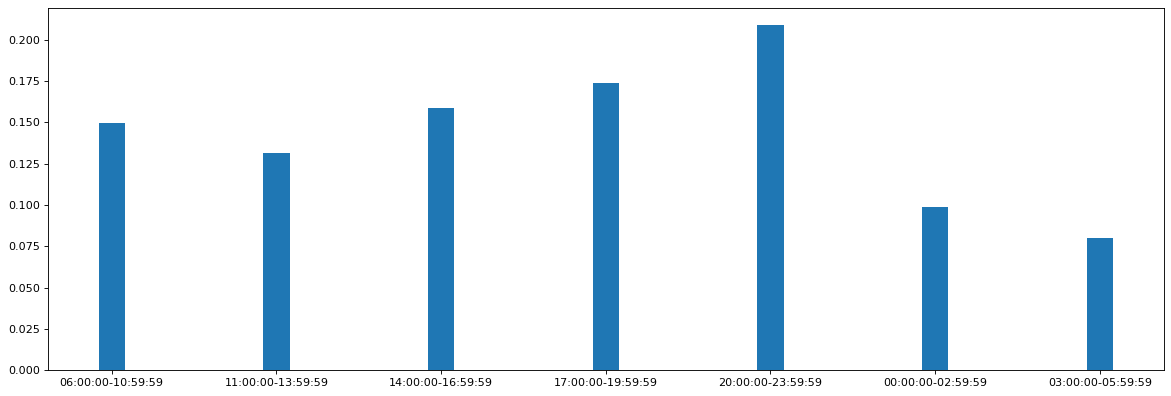

In [ ]:
interval=["06:00:00-10:59:59","11:00:00-13:59:59","14:00:00-16:59:59","17:00:00-19:59:59","20:00:00-23:59:59","00:00:00-02:59:59","03:00:00-05:59:59"]
time_interval(interval)

The most common time in which users publish their posts is from 20:00:00 to 23:59:59.  
But as we can see from the chart there is not a wide gap among the intervals, maybe because the posts are from profiles  that are located in different time zone.

# RQ4
In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

## RQ4.1
Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [ ]:
def profiler(profile):
    q3=pd.read_csv("~/instagram_posts.csv",nrows=1,delimiter="\t")
    colonne=list(q3.columns)
    dpost= pd.DataFrame(columns=colonne)
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000, delimiter="\t")):
        dpost=pd.concat([dpost,chunk[chunk.profile_id == profile]])
        
    return dpost

In [ ]:
profilo=2237947779
nposts=profiler(profilo)
nposts.head(1)

86it [03:47,  2.64s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915.00,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0


## RQ4.2
Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [ ]:
#I will not use the function that was created in the last exercise.
#I made this choice because in this way the process will be faster, infact we only iterate once in the heavy instagram_posts dataset.

#If we want to use the function created in the last exercise he have to iterate on instagram_posts dataset n times, and that is not efficient.
#Anyway i will also implement this method in order to complete at 100% the exercise.

#Faster way (my way)
def first_n_profiles_post(n):
    q3=pd.read_csv("~/instagram_posts.csv",nrows=1,delimiter="\t")
    colonne=list(q3.columns)
    npost= pd.DataFrame(columns=colonne)
    
    top=profiles.sort_values(by="n_posts",ascending=False).head(n)
    top=list(top.profile_id.astype(int))
    
    #Same as before we have to deal with big dataset.
    #So we are going to use unix command to cut the dataset and make it smaller, other than work with chunk.
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000, delimiter="\t")):
        npost=pd.concat([npost,chunk[chunk.profile_id.isin(top)]])
    
    return npost 

# Slow way (request by the exercise)
def first_n_profiles_post_slow(n):
    q3=pd.read_csv("~/instagram_posts.csv",nrows=1,delimiter="\t")
    colonne=list(q3.columns)
    npost= pd.DataFrame(columns=colonne)
    
    top=profiles.sort_values(by="n_posts",ascending=False).head(n)
    top=list(top.profile_id.astype(int))
    
    for i in range(0,len(top)):
        rows=profiler(int(top[i]))
        npost=pd.concat([npost,rows])
    return npost


#In the fast way the compute time will be approximately the same for any n chosen.
#In the slow way the compute time will be : runningtime of the fastway * n

In [ ]:
#fastfunction
rq42=first_n_profiles_post(2)
rq42

86it [03:47,  2.65s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9592952,21205477,3661552,Bq3hP3Khp8J,199664772.00,1029593228.00,2018-12-02 03:03:33.000,1,NaN,0,0
9592953,21205482,3661552,Bq3hN53hUsD,199664772.00,1029593228.00,2018-12-02 03:03:17.000,1,NaN,0,0
9592954,24906254,3661552,BCqCe9LypeF,199664772.00,1029569178.00,2016-03-07 16:28:50.000,1,#تصويري,27,0
9592955,25468626,3661552,20Wu4zypd2,199664772.00,237398449.00,2015-05-18 11:21:27.000,1,#تصويري,28,0
9592956,27616128,3661552,BrKq76AhadU,199664772.00,321337322.00,2018-12-09 13:33:47.000,1,NaN,1,0
9592957,28243841,3661552,Bq_MjFzB_Wt,199664772.00,280774016.00,2018-12-05 02:36:36.000,1,NaN,7,0
9592958,28243843,3661552,Bq_MiKhhP05,199664772.00,280774016.00,2018-12-05 02:36:28.000,1,NaN,3,0
9592959,36453059,3661552,BpQ2cmKF-W0,199664772.00,1023754497.00,2018-10-23 07:07:01.000,1,NaN,1,0
9592960,8768851,3661552,3V4OeXypTT,199664772.00,279384086.00,2015-05-31 11:49:04.000,1,#تصويري,19,0
9592961,37701663,3661552,BzUmjr2pgni,199664772.00,nan,2019-06-30 07:19:05.000,1,NaN,11,0


In [ ]:
#slowfunction
npo_slow=first_n_profiles_post_slow(2)
npo_slow

86it [03:47,  2.64s/it]
86it [03:46,  2.64s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9592952,21205477,3661552,Bq3hP3Khp8J,199664772.00,1029593228.00,2018-12-02 03:03:33.000,1,NaN,0,0
9592953,21205482,3661552,Bq3hN53hUsD,199664772.00,1029593228.00,2018-12-02 03:03:17.000,1,NaN,0,0
9592954,24906254,3661552,BCqCe9LypeF,199664772.00,1029569178.00,2016-03-07 16:28:50.000,1,#تصويري,27,0
9592955,25468626,3661552,20Wu4zypd2,199664772.00,237398449.00,2015-05-18 11:21:27.000,1,#تصويري,28,0
9592956,27616128,3661552,BrKq76AhadU,199664772.00,321337322.00,2018-12-09 13:33:47.000,1,NaN,1,0
9592957,28243841,3661552,Bq_MjFzB_Wt,199664772.00,280774016.00,2018-12-05 02:36:36.000,1,NaN,7,0
9592958,28243843,3661552,Bq_MiKhhP05,199664772.00,280774016.00,2018-12-05 02:36:28.000,1,NaN,3,0
9592959,36453059,3661552,BpQ2cmKF-W0,199664772.00,1023754497.00,2018-10-23 07:07:01.000,1,NaN,1,0
9592960,8768851,3661552,3V4OeXypTT,199664772.00,279384086.00,2015-05-31 11:49:04.000,1,#تصويري,19,0
9592961,37701663,3661552,BzUmjr2pgni,199664772.00,nan,2019-06-30 07:19:05.000,1,NaN,11,0


For the slow function the running time is : 07'33".
For the fast function the running time is : 03'47".
So as we were saying the running time of the slowfunction  is n times the running time of the fastfunction.

## RQ4.3
What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [ ]:
npo=first_n_profiles_post(10)
npo.head(1)

86it [03:46,  2.64s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,244873610.00,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1,0


First evaluate the mean of the comments and likes for all the top 10 profiles together.

In [ ]:
round(npo.numbr_likes.mean(skipna = True),2)     #mean of all likes

3.17

In [ ]:
round(npo.number_comments.mean(skipna = True),2) #mean of all comments

0.03

Then we take the evaluate the mean of the comments and likes for each profile.

In [ ]:
df = npo.astype({'numbr_likes':'int','number_comments':'int'}) #change the type of columns in order to groupify and calculate the mean

In [ ]:
df.groupby("profile_id")['numbr_likes'].mean() #mean of likes for every single top 10 users

profile_id
9813508.00      0.30
199664772.00    7.67
218172998.00    0.40
285549744.00    3.92
1087613619.00   2.03
1273455368.00   2.96
1603889832.00   6.48
1607309412.00   1.54
8563366588.00   0.00
Name: numbr_likes, dtype: float64

In [ ]:
df.groupby("profile_id")['number_comments'].mean()  #mean of comments for every single top 10 users

profile_id
9813508.00      0.00
199664772.00    0.00
218172998.00    0.04
285549744.00    0.00
1087613619.00   0.18
1273455368.00   0.04
1603889832.00   0.04
1607309412.00   0.00
8563366588.00   0.00
Name: number_comments, dtype: float64

## RQ4.4
Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [ ]:
npo.head(5)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,244873610.00,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1,0
241977,28616591,3851869,BxtZ7__Fosq,1607309412,362172550977423.00,2019-05-21 05:27:02.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0
319192,28694641,3851869,ByB2YpbnoZs,1607309412,208691.00,2019-05-29 04:00:25.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,4,0
494943,28873428,3944512,BxjqpeJhofB,1603889832,297115043.00,2019-05-17 10:40:38.000,1,"#gamt 1,290 free ems #gamtthailand #gamtsungla...",4,0
592982,28973172,345591,BsImXwXgQHo,1087613619.00,429994336.00,2019-01-02 14:46:48.000,1,NaN,0,0


In [ ]:
from datetime import datetime
import re
from collections import Counter
from matplotlib.pyplot import figure

def time_interval_rq4(interval,data):
    conta=Counter()
    
    #Inizialization of the counter, this is done in order to have a sorted plot by interval
    for a in range(0,len(interval)):
        conta[interval[a]] += 0
    #Essendo il programma già molto pesante abbiamo creato dal terminale unix un datasey più leggero solo con la variabile
    #di interesse.
    #Codice per fare questo:
    #cut -f 6  instagram_posts.csv > orario.csv
    

    data.cts=pd.to_datetime(data.cts) #that make type of cts variable from "object" to "datetime"
    for oss in data.cts.dt.time :
        try:
            oss=oss.strftime('%H:%M:%S')

            for j in range(0,len(interval)):
                intervalli=re.findall(r"[0-9:]+",interval[j])
                inizio=datetime.strptime(intervalli[0], '%H:%M:%S').strftime("%H:%M:%S")
                fine=datetime.strptime(intervalli[1], '%H:%M:%S').strftime("%H:%M:%S")
                if oss >= inizio and oss <= fine:
                    conta[interval[j]] += 1
                    break
        except:
            pass

                
    x=[5*i for i in range(len(interval))]
    y=np.array([conta[i] for i in conta.keys()])
    tot=sum(y)
    figure(figsize=(18, 6), dpi=80)
    plt.bar(x,y/tot,tick_label=interval)
    plt.show()

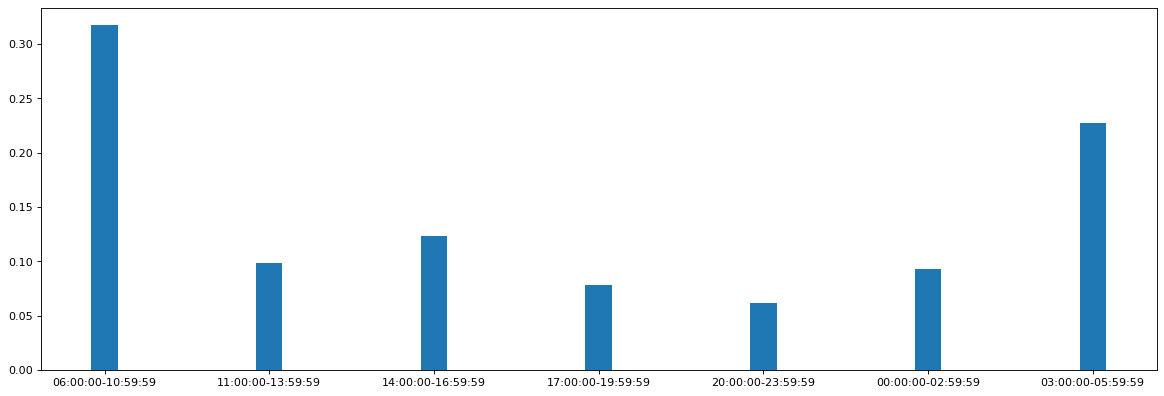

In [ ]:
interval=["06:00:00-10:59:59","11:00:00-13:59:59","14:00:00-16:59:59","17:00:00-19:59:59","20:00:00-23:59:59","00:00:00-02:59:59","03:00:00-05:59:59"]
time_interval_rq4(interval,npo)

The most common time in which top 10 users publish their posts is from 06:00:00 to 10:59:59.  


# RQ5


## RQ5.1
Plot the top 10 most popular users in terms of followers and their number of posts.

In [ ]:
toppopular10=profiles.sort_values(by=["followers","n_posts"],ascending=False).head(10)
toppopular10 #find the top 10 profile by followers

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.00,instagram,Instagram,Bringing you closer to the people and things y...,226.00,285457645.00,5760.00,help.instagram.com,NaN,False
2582507,371414,3416684.00,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.00,65269440.00,7355.00,like2b.uy/victoriassecret,NaN,True
3820939,337097,20824486.00,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.00,35339708.00,28816.00,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,187619120.00,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.00,30689316.00,3352.00,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2125506698.00,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.00,30246783.00,2791.00,tasty.co/linkinbio,NaN,True
2785241,3437294,496865116.00,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.00,29542143.00,990.00,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,23410080.00,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.00,29176804.00,4566.00,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,24239929.00,princessyahrini,Syahrini,NaN,835.00,29042823.00,4719.00,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,50417061.00,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.00,26476004.00,1311.00,www.ignite.co,NaN,True
1703764,3513205,907025384.00,akshaykumar,Akshay Kumar,#AkshayKumar,5.00,26252169.00,1173.00,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


## RQ5.2
Who is the most influential user? Instagram with 285457645 followers and 	5760 posts

## RQ5.3
Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [ ]:
def profiler_rq53(profile):

    dpost= pd.DataFrame(columns=["profile_id","location_id"])
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",usecols=["profile_id","location_id"],chunksize=500000, delimiter="\t")):
        dpost=pd.concat([dpost,chunk[chunk.profile_id.isin(profile)]])
        
    return dpost

In [ ]:
idd=list(toppopular10.profile_id)  #take the id of the  top 10 profile by followers
postoppopular10=profiler_rq53(idd) #take all the posts of those profile

86it [01:35,  1.11s/it]


In [ ]:
id_location=list(postoppopular10.location_id)       #extract the id.location from those posts
loctop10=locations[locations.id.isin(id_location)]  #location(dataset location) related to id_location (dataset posts)

In [ ]:
#In the next line we are gonna create a dataframe with the table of frequency of the location, and also change the column name.
a = postoppopular10.location_id.value_counts().rename_axis('id').to_frame('counts')  
a['idd'] =a.index      #add a column with the id of the location, it's mandatory for the merge operation.
c=pd.merge(a, loctop10[["city","id"]].rename(columns={'id':'idd'}), on='idd')  #we merge the dataset with the name of areas and his frequency.

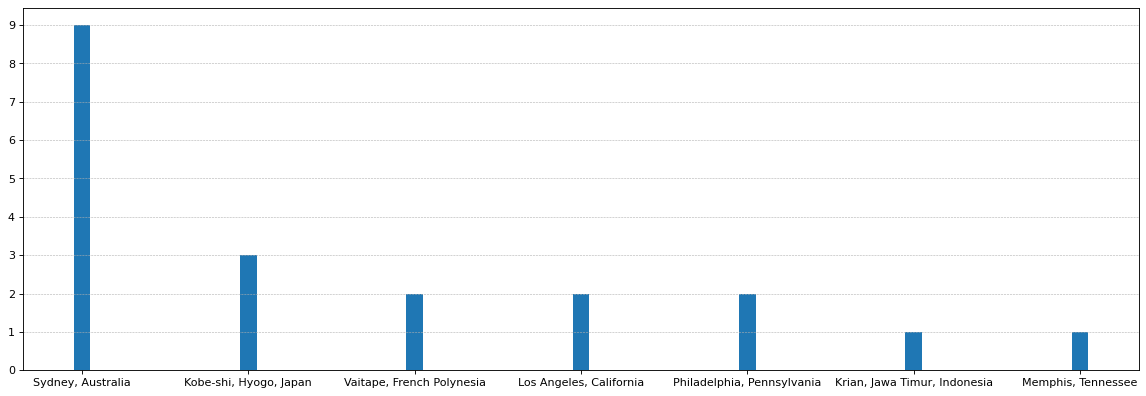

In [ ]:
size=7
x=[i*4for i in range(0,size)]
y=pd.array(c.counts)[0:size]                               #Hights
labs=list(c.city)[0:size]                                  #Creating labs


figure(figsize=(18, 6), dpi=80)


plt.bar(x,y,width=0.4,tick_label=labs)  #barplot

plt.yticks(ticks=[i for i in range(0,int(c.counts.head(1)+1))])
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5)
plt.show()

We excluded cities with low frequency in order to have a more readable chart.

## RQ5.4
How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [ ]:
def profiler_rq53(profile):
    q3=pd.read_csv("~/instagram_posts.csv",nrows=1,delimiter="\t")
    colonne=list(q3.columns)
    dpost= pd.DataFrame(columns=colonne)
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000, delimiter="\t")):
        dpost=pd.concat([dpost,chunk[chunk.profile_id.isin(profile)]])
         
    return dpost

In [ ]:
idd=list(toppopular10.profile_id)
postoppopular10=profiler_rq53(idd)

86it [03:50,  2.68s/it]


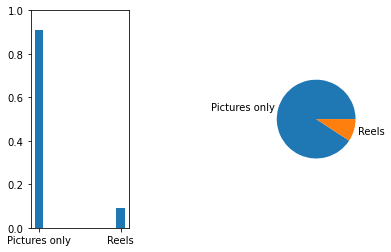

In [ ]:
fig = plt.figure() #set figure
tot=sum(np.array(postoppopular10.post_type.value_counts()))
labs = ["Pictures only","Reels"]                  #Creating labs
valori = np.array(postoppopular10.post_type.value_counts())/tot  #Values
 


ax1=plt.subplot(1,3,1)  #set first subplot 
plt.bar(labs,valori,width=0.1)  #barplot
ax1.set_ylim(0,1)
plt.subplot(1,3,3)  #set second subplot 
plt.pie(valori,labels=labs)

plt.show() 

Most of the posts of the top 10 contains only pictures.  
There is no posts with pictures and videos.

## RQ5.5


### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts?

**Post  with only pictures** 

In [ ]:
postoppopular10[postoppopular10.post_type==1].numbr_likes.sum() # "likes" that post  with only pictures receive

69285634.0

In [ ]:
postoppopular10[postoppopular10.post_type==1].number_comments.sum() #comments that post with only pictures receive

497013.0

**Reels**

In [ ]:
postoppopular10[postoppopular10.post_type==2].numbr_likes.sum() #comments that reels  receive

3464814

In [ ]:
postoppopular10[postoppopular10.post_type==2].number_comments.sum() #comments that reels receive

26258

**Mixed post**

In [ ]:
postoppopular10[postoppopular10.post_type==3].numbr_likes.sum() # mixed post didn't get any likes

0

In [ ]:
postoppopular10[postoppopular10.post_type==3].number_comments.sum()  # mixed post didn't get any comments

0

###  Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.


#### Confront average number with followers amount. Only photos posts

In [ ]:
df = postoppopular10[postoppopular10.post_type==1].astype({'numbr_likes':'int','number_comments':'int'}) #change the type of columns in order to groupify and calculate the mean

#Calculate the average number of likes for each profile 
likes=df.groupby("profile_id")['numbr_likes'].mean().apply(lambda x: '%.3f' % x) #mean of likes for every single top 10 users
likes=likes.to_frame("Average likes")
likes=likes.reset_index()
likes=pd.merge(likes,toppopular10[["profile_id","followers"]],on="profile_id")

#Calculate the average number of comments for each profile 
comments=df.groupby("profile_id")['number_comments'].mean().apply(lambda x: '%.3f' % x)  #mean of comments for every single top 10 users
comments=comments.to_frame("Average comments")
comments=comments.reset_index()

#Merge the data
likes_comments=pd.merge(likes,comments,on="profile_id")

#Reorganize the dataset
cols =['profile_id', 'Average likes', 'Average comments', 'followers']
likes_comments=likes_comments[cols]

likes_comments

,profile_id,Average likes,Average comments,followers
0,3416684.00,230749.800,438.400,65269440.00
1,20824486.00,242235.692,1087.846,35339708.00
2,23410080.00,81213.500,365.000,29176804.00
3,24239929.00,141873.348,757.435,29042823.00
4,25025320.00,905933.452,6703.290,285457645.00
5,50417061.00,863113.267,8594.733,26476004.00
6,187619120.00,186857.000,867.000,30689316.00
7,496865116.00,473022.667,2237.083,29542143.00
8,907025384.00,1027101.846,6582.462,26252169.00
9,2125506698.00,100862.923,963.154,30246783.00


#### Confront average number with followers amount. Only videos posts

In [ ]:
df = postoppopular10[postoppopular10.post_type==2].astype({'numbr_likes':'int','number_comments':'int'}) #change the type of columns in order to groupify and calculate the mean

#Calculate the average number of likes for each profile 
likes=df.groupby("profile_id")['numbr_likes'].mean().apply(lambda x: '%.3f' % x) #mean of likes for every single top 10 users
likes=likes.to_frame("Average likes")
likes=likes.reset_index()
likes=pd.merge(likes,toppopular10[["profile_id","followers"]],on="profile_id")

#Calculate the average number of comments for each profile 
comments=df.groupby("profile_id")['number_comments'].mean().apply(lambda x: '%.3f' % x)  #mean of comments for every single top 10 users
comments=comments.to_frame("Average comments")
comments=comments.reset_index()

#Merge the data
likes_comments=pd.merge(likes,comments,on="profile_id")

#Reorganize the dataset
cols =['profile_id', 'Average likes', 'Average comments', 'followers']
likes_comments=likes_comments[cols]

likes_comments

,profile_id,Average likes,Average comments,followers
0,3416684.00,261408.000,583.000,65269440.00
1,20824486.00,207295.600,1026.800,35339708.00
2,24239929.00,41763.667,903.333,29042823.00
3,25025320.00,593409.667,5749.333,285457645.00


#### Confront average number with followers amount. All type posts

In [ ]:
df = postoppopular10.astype({'numbr_likes':'int','number_comments':'int'}) #change the type of columns in order to groupify and calculate the mean

#Calculate the average number of likes for each profile 
likes=df.groupby("profile_id")['numbr_likes'].mean().apply(lambda x: '%.3f' % x) #mean of likes for every single top 10 users
likes=likes.to_frame("Average likes")
likes=likes.reset_index()
likes=pd.merge(likes,toppopular10[["profile_id","followers"]],on="profile_id")

#Calculate the average number of comments for each profile 
comments=df.groupby("profile_id")['number_comments'].mean().apply(lambda x: '%.3f' % x)  #mean of comments for every single top 10 users
comments=comments.to_frame("Average comments")
comments=comments.reset_index()

#Merge the data
likes_comments=pd.merge(likes,comments,on="profile_id")

#Reorganize the dataset
cols =['profile_id', 'Average likes', 'Average comments', 'followers']
likes_comments=likes_comments[cols]

likes_comments
#apply(lambda x: '%.3f' % x) allow us too remove scientific notation.

,profile_id,Average likes,Average comments,followers
0,3416684.00,239509.286,479.714,65269440.00
1,20824486.00,232530.111,1070.889,35339708.00
2,23410080.00,81213.500,365.000,29176804.00
3,24239929.00,130322.231,774.269,29042823.00
4,25025320.00,878357.824,6619.118,285457645.00
5,50417061.00,863113.267,8594.733,26476004.00
6,187619120.00,186857.000,867.000,30689316.00
7,496865116.00,473022.667,2237.083,29542143.00
8,907025384.00,1027101.846,6582.462,26252169.00
9,2125506698.00,100862.923,963.154,30246783.00


Seems to be no a difference between number of average likes and comments between the types of posts.

# RQ6

## RQ6.1

In [3]:
posts_cts=pd.DataFrame(columns=["profile_id","cts"])
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["profile_id","cts"], delimiter="\t")):
        posts_cts=pd.concat([posts_cts,chunk.dropna()])   

86it [04:06,  2.87s/it]


In [4]:
posts_cts.to_csv("~/instagram_posts_cts.csv")

In [6]:
#Merge the two datasets in order to create a new one that contain for each post : the followers and following of the account that made the post.
merge_cts_df=pd.DataFrame(columns=["profile_id","cts"])
profiles_id = pd.read_csv("~/instagram_profiles.csv", usecols=['profile_id'], delimiter="\t")
for chunk in tqdm(pd.read_csv("~/instagram_posts_cts.csv",chunksize=500000)):
    merge_cts_df=pd.concat([merge_cts_df,pd.merge(profiles_id,chunk,on="profile_id")])   

81it [05:22,  3.98s/it]


In [11]:
# The dataset merge_cts_df contains data of posts only for profiles contained in instagram_profiles 

cts = merge_cts_df.dropna()

cts_groupby_profile = cts.groupby(by='profile_id')

profileIds = cts_groupby_profile.indices.keys()
# We can increase the parameter min_posts if we want to get the average only for profiles that have more posts
min_posts = 2
format = "%Y-%m-%d %H:%M:%S.%f"
user_average = dict()

for profileId in tqdm(profileIds) :
    # we get the cts for each profile
    times = cts_groupby_profile.get_group(profileId)
    times = list(times.cts.drop_duplicates())
    if len(times) > min_posts :
        # we compute each delta between two consecutive posts
        deltas = []
        for i in range (0, len(times)-1) :
            time1 = datetime.strptime(times[i], format)
            time2 = datetime.strptime(times[i+1], format)
            time_delta = abs(time2-time1)
            deltas.append(time_delta)
        average = pd.to_timedelta(pd.Series(deltas)).mean()
        user_average[profileId] = average

# we sort the means
user_average_sorted = {k: v for k, v in sorted(user_average.items(), key=lambda item: item[1])}

100%|██████████| 2173843/2173843 [34:32<00:00, 1048.66it/s]


In [16]:
# we get only the top 3 users that publish posts more frequently
i = 0
for item in user_average_sorted.items() :
    print(item)
    i += 1
    if i == 3 :
        break

(4566388382.0, Timedelta('0 days 00:00:01.142857142'))
(381021425.0, Timedelta('0 days 00:00:01.250000'))
(7495516905.0, Timedelta('0 days 00:00:01.250000'))


In [17]:
profiles[profiles.profile_id == 4566388382.0]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2659831,2011718,4.566388e+09,aaangela_c,Angela Chan,NaN,141.0,26.0,99.0,NaN,2019-04-04 10:57:57.999 -0400,False


In [25]:
cts_groupby_profile.get_group(4566388382.0).cts

303160    2018-10-30 23:23:17.000
303161    2018-10-30 23:23:16.000
303162    2018-10-30 23:23:15.000
303163    2018-10-30 23:23:13.000
303164    2018-10-30 23:23:12.000
303165    2018-10-30 23:23:12.000
303166    2018-10-30 23:23:12.000
303167    2018-10-30 23:23:12.000
303168    2018-10-30 23:23:11.000
303169    2018-10-30 23:23:10.000
303170    2018-10-30 23:23:10.000
303171    2018-10-30 23:23:09.000
Name: cts, dtype: object

In [18]:
profiles[profiles.profile_id == 381021425.0]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
1086168,777017,381021425.0,mass_biscarini,Mass Biscarini,NaN,5365.0,213.0,5.0,NaN,2019-03-26 03:40:34.376 -0400,False


In [24]:
cts_groupby_profile.get_group(381021425.0).cts

347082    2013-05-16 13:09:11.000
347083    2013-05-16 13:09:10.000
347084    2013-05-16 13:09:09.000
347085    2013-05-16 13:09:07.000
347086    2013-05-16 13:09:06.000
Name: cts, dtype: object

In [19]:
profiles[profiles.profile_id == 7495516905.0]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2534880,2456657,7.495517e+09,turkerbolatli2775,Türker Bolatlı,🔸Özel ders ve hızlı zayıflama \n🔸Sporcu ürünle...,5507.0,96.0,16.0,NaN,2019-04-08 12:47:43.332 -0400,False


In [23]:
cts_groupby_profile.get_group(7495516905.0).cts

184402    2018-04-13 13:30:21.000
184403    2018-04-13 13:30:21.000
184404    2018-04-13 13:30:21.000
184405    2018-04-13 13:30:21.000
184406    2018-04-13 13:30:21.000
184407    2018-04-13 13:30:20.000
184408    2018-04-13 13:30:19.000
184409    2018-04-13 13:30:19.000
184410    2018-04-13 13:30:19.000
184411    2018-04-13 13:30:18.000
184412    2018-04-13 13:30:18.000
184413    2018-04-13 13:30:16.000
Name: cts, dtype: object

We can see that users that publish most frequently have an average of time between posts of approximately one second.

But, if we look at the times of theirs posts, we can notice that their are all during the same minute. Also, this high frequence doesn't seem to have a good impact on their number of followers.

So, if we want to analyze in detail the average time a user lets pass before publishing another post, we may not consider those 'noisy' profiles that have unsual behaviors. These profiles could be bot, profiles with only posts in the same minute, profiles with a number of posts that is not relevant.

## RQ6.2
Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [ ]:
from datetime import datetime
import re
from collections import Counter
from matplotlib.pyplot import figure


def time_interval(interval):
    conta=Counter()
    conta_like=Counter()
    conta_comment=Counter()
    
    #Inizialization of the counter, this is done in order to have a sorted plot by interval
    for a in range(0,len(interval)):
        conta[interval[a]] += 0
        conta_like[interval[a]] += 0
        conta_like[interval[a]] += 0
    
    
    for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",usecols=["numbr_likes","number_comments","cts"],chunksize=250000, delimiter="\t")):
        chunk.cts=pd.to_datetime(chunk.cts)
            
        for index, row in chunk.iterrows():
            try:
                oss_cts=row.cts.strftime('%H:%M:%S')
                for j in range(0,len(interval)):
                    intervalli=re.findall(r"[0-9:]+",interval[j])
                    inizio=datetime.strptime(intervalli[0], '%H:%M:%S').strftime("%H:%M:%S")
                    fine=datetime.strptime(intervalli[1], '%H:%M:%S').strftime("%H:%M:%S")

                    if oss_cts >= inizio and oss_cts <= fine:
                      
                        conta[interval[j]] += 1
                        conta_like[interval[j]] += row['numbr_likes']
                        conta_comment[interval[j]] += row['number_comments']
                        break
            except:
                pass
    
    for k in conta.keys(): #this loop is to calculate the means
        conta_like[k]= int(round(conta_like[k]/conta[k],0))
        conta_comment[k]= int(round(conta_comment[k]/conta[k],0))
    
  
    fig=plt.figure()                 
    figure(figsize=(18, 12), dpi=80)    

    
    x=[5*i for i in range(len(interval))]
    
    ax1=plt.subplot(2,1,1)
    
    y1=np.array([conta_like[i] for i in conta_like.keys()])
    tot1=sum(y1)

    ax1.title.set_text('Average number of likes on posts')
    plt.bar(x,y1,tick_label=interval)
    plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5)
    
    
    ax2=plt.subplot(2,1,2)
    
    y2=np.array([conta_comment[i] for i in conta_comment.keys()])
    tot2=sum(y2)
    
    ax2.title.set_text('Average number of comments on posts')
    plt.bar(x,y2,tick_label=interval)
    
    plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5)
    plt.show()   

In [ ]:
interval=["06:00:00-10:59:59","11:00:00-13:59:59","14:00:00-16:59:59","17:00:00-19:59:59","20:00:00-23:59:59","00:00:00-02:59:59","03:00:00-05:59:59"]
time_interval(interval)

0it [00:00, ?it/s]

# RQ7

## RQ7.1
What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

We will find the probability in an empirical way.
We will find all the positive case (post receives more than 20% "likes" of the number of followers that the user has) and divide them by the total.

In [ ]:
#Import the profile dataset 
prof=pd.read_csv("~/instagram_profiles.csv",usecols=["profile_id","followers"],delimiter="\t")
prof=prof.dropna() #NA are dropped

In [ ]:
#Import the posts dataset without NA
df=pd.DataFrame(columns=["profile_id","numbr_likes"])
for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",chunksize=500000,usecols=["profile_id","numbr_likes"], delimiter="\t")):
        df=pd.concat([df,chunk.dropna()])

86it [03:30,  2.44s/it]


In [ ]:
df.to_csv("~/SageMaker/dataSQ71.csv") #we store it in order to avoid loss of data when AWS notebook will be shutted down
df.shape

(40126905, 2)

In [ ]:
#Merge the two datasets in order to create a new one that contain for each post : the number of likes, the number of followers of the account that made the post.
mergedf=pd.DataFrame(columns=["profile_id","followers","numbr_likes"])
for chunk in tqdm(pd.read_csv("~/SageMaker/dataSQ71.csv",usecols=["profile_id","numbr_likes"],chunksize=500000)):
    mergedf=pd.concat([mergedf,pd.merge(prof,chunk,on="profile_id")])   

81it [05:11,  3.84s/it]


In [ ]:
mergedf.to_csv("~/SageMaker/dataSQ71LS.csv") #LS stand for last step,we store it in order to avoid loss of data when AWS notebook will be shutted down
mergedf.shape

(24708644, 3)

In [ ]:
#Now we have a dataset that have : for each post the number of likes, the number of followers of the account that made the post.
mergedf.head(5)

,profile_id,followers,numbr_likes
0,4.696703e+06,17403.0,468
1,3.079030e+07,3290.0,161
2,6.018117e+09,214.0,25
3,6.093878e+09,268.0,7
4,2.259229e+08,1306.0,70


In [ ]:
casi_favorevoli = mergedf[mergedf['numbr_likes'] > mergedf["followers"]/5]
print("The probability that a post receives more than 20% 'likes' of the number of followers a user has is :",round(casi_favorevoli.shape[0]/mergedf.shape[0],2)*100,"%")

The probability that a post receives more than 20% 'likes' of the number of followers a user has is : 16.0 %


## RQ7.2
Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

# RQ8

## RQ8.1 
Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts

86it [01:43,  1.20s/it]


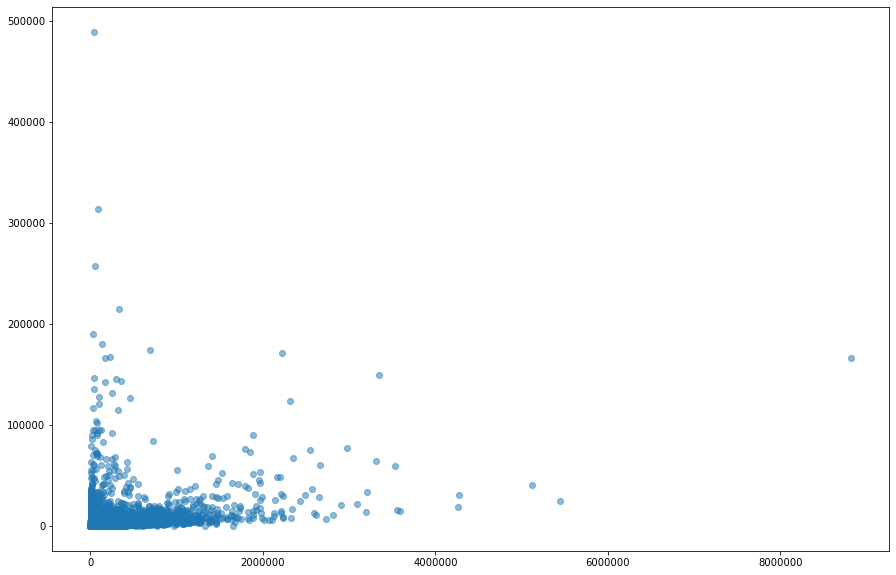

In [ ]:
n_likes = np.array([]) #array in which we'll put all the element of the variable numbr_likes
n_comments = np.array([]) #array in which we'll put all the element of the variable number_comments

for chunk in tqdm(pd.read_csv("~/instagram_posts.csv",usecols=["numbr_likes","number_comments"],chunksize=500000, delimiter="\t")):
    chunk.dropna(inplace=True) 
    n_likes = np.concatenate((n_likes,np.array(chunk.numbr_likes.tolist())),axis=None)
    n_comments = np.concatenate((n_comments,np.array(chunk.number_comments.tolist())),axis=None)
    
plt.figure(figsize=(15,10))
plt.ticklabel_format(style = 'plain')
plt.scatter(n_likes,n_comments,alpha=0.5)
plt.show()

As we can see from the scatter plot we can't say that more likes mean more comments because there isn't a linear relationship between the number of likes and comments.

## RQ8.2 
Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? 

First of all we've written a code that for every hour of the day print the average of likes and comments received by posts published in that hour.

In [3]:
#first we read from the dataset instagram_posts just 3 columns: 'cts', 'numbr_likes' and 'number_comments'
post = pd.read_csv("~/instagram_posts.csv",usecols=["cts","numbr_likes","number_comments"], delimiter="\t")



post.dropna(inplace = True) #Then we drop the NaN values
post.cts = pd.to_datetime(post.cts)
post.cts = post.cts.dt.time

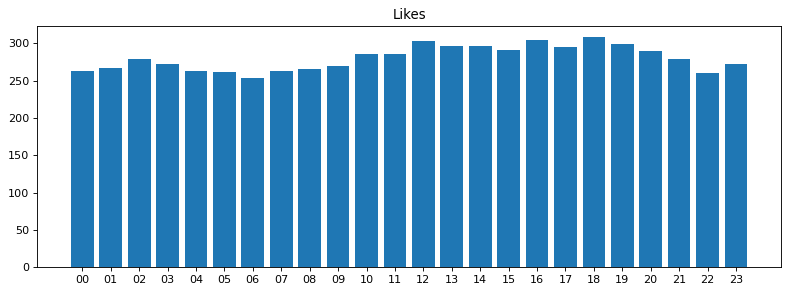

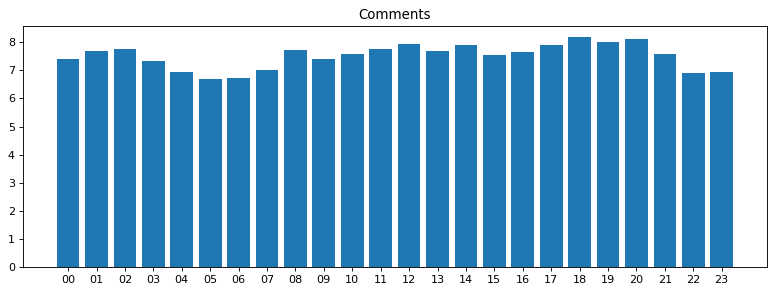

In [5]:
interval = np.array(['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
conta_likes = np.zeros(len(interval)) # each value corresponds to the sum of all likes received by the posts published in a specific hour
conta_comments = np.zeros(len(interval)) # each value corresponds to the sum of all comments received by the posts published in a specific hour
how_many = np.zeros(len(interval)) # for counting how many likes/comments there are for all the posts published in a specific hour

for i in range(post.shape[0]):
    try:
        hour = post.cts[i]
        hour = hour.strftime('%H:%M:%S')
        hour = hour[0]+hour[1] #for every post, hour contains only the hour in which it was published
        if hour in interval:
            conta_likes[np.where(interval == hour)] += post.numbr_likes[i] 
            conta_comments[np.where(interval == hour)] += post.number_comments[i]
            how_many[np.where(interval == hour)] += 1
        else:
            continue
    except:
        pass  

#for every hour i in interval, conta_likes[i] and conta_comments[i] contain the avarage of likes and comments received by posts
#published in that hour
for j in range(len(conta_likes)):
    conta_likes[j]=conta_likes[j]/how_many[j] 
    conta_comments[j]=conta_comments[j]/how_many[j]

figure(figsize=(12, 4), dpi=80)
plt.ticklabel_format(style = 'plain')
plt.title('Likes', color='black')
plt.bar(interval,conta_likes,tick_label=interval)
plt.show()
figure(figsize=(12, 4), dpi=80)
plt.title('Comments', color='black')
plt.ticklabel_format(style = 'plain')
plt.bar(interval,conta_comments,tick_label=interval)
plt.show()

As we can see from the bar plots, the hour in which posts published in that hour receive a greater amount of likes and comments is 18:00-19:00.   
We can even notice that there aren't wide gaps between each hours for both likes and comments.  
In order to see if there exists any linear relationship between the time a user publishes a post and the number of comments and likes it could be done a statistical test.

## RQ8.3
What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [ ]:
profiles.dropna(subset=["followers"],inplace=True) #First we drop all the Nan values in the followers column

In [ ]:
#We can use the function describe to extract mean and quantiles (25%, 50%, 75%)
profiles.followers.describe().apply(lambda x: '%.2f' % x)

count      3446893.00
mean          4744.66
std         194071.17
min              0.00
25%            159.00
50%            406.00
75%            974.00
max      285457645.00
Name: followers, dtype: object

In [ ]:
#Then we can use the function mode() to extract the mode of the variable followers
print(profiles.followers.mode())

0    0.0
dtype: float64


We can now plot the distribution of the variable followers:

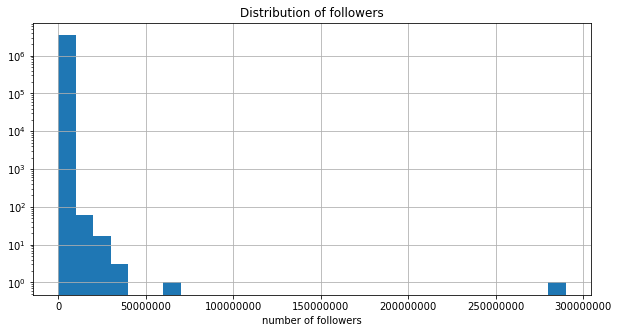

In [ ]:
bin_values = np.arange(start=0, stop=profiles.followers.max()+10000000, step=10000000) #it creates the bins range, starting from 0 to the maximum 
#value of followers + 10000000 with a step of 10000000
plt.title('Distribution of followers', color='black')
plt.ticklabel_format(style = 'plain') #in order to avoid scientific notation in the labels
plt.yscale("log") # we've set a logarithmic scale along the axis y in order to have a more readable output
plt.xlabel('number of followers')
profiles['followers'].hist(bins=bin_values, figsize=[10,5]) 
plt.show()

As we can see in the plot most of the users have a number of followers between 0 and 10000000. We can even notice that only two users have a number of followers greater than 50000000.   
Now we print the distribution of followers between the first and third quantiles (159, 406):

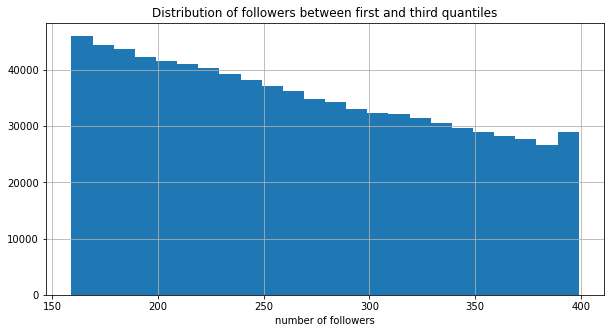

In [ ]:
bin_values1 = np.arange(start=159, stop=406, step=10)
plt.title('Distribution of followers between first and third quantiles', color='black')
plt.ticklabel_format(style = 'plain') #in order to avoid scientific notation in the labels
profiles['followers'].hist(bins=bin_values1, figsize=[10,5])
plt.xlabel('number of followers')
plt.show()

Then we plot the empirical distribution of followers amongst all users.  
Even in this case, in order to have a more readable output, we've used the logarithmic scale but this time along the axis x.

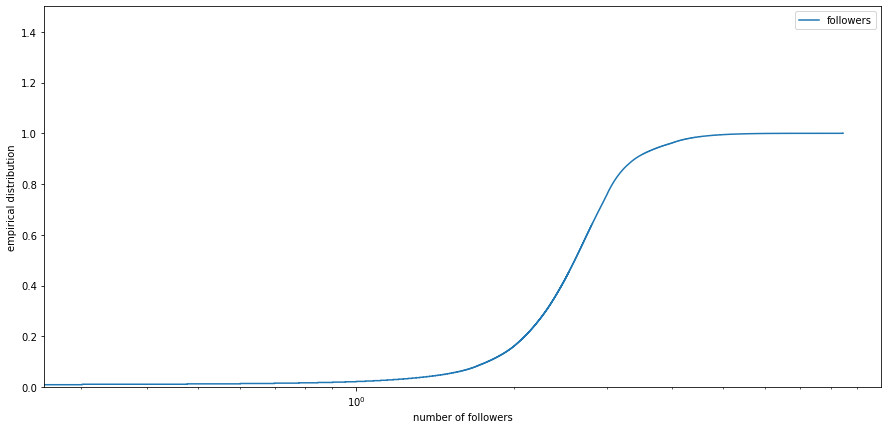

In [ ]:
import warnings
warnings.filterwarnings("ignore")

profiles=pd.DataFrame(profiles.followers)
plt.figure(figsize=(15,7))
seaborn.ecdfplot(profiles,log_scale=True) 
plt.ylim(0, 1.5)
plt.xlabel('number of followers')
plt.ylabel('empirical distribution')
plt.show()

## RQ8.4
What are histograms, bar plots, scatterplots and pie charts used for?

First of all they all are graphic tools, used to visualize the distribution data.

Histograms for example can be used to plot the distribution of a data, as seen before with the distribution of followers.

Bar plots are not so different from histograms. The main difference is that in bar plots there is a space between every rectangle and so is more used for rapresent "categories". We've seen this tool in RQ3 plotting the amount of posts published in different time intervals.

Scatterplots can be used to see if there are any correlation between two observed data, as seen before with likes and comments.

Pie charts are a good graphical tool to show the frequency of the types that a variable can assume.



## RQ8.5
What insights can you extract from a Box Plot?

From a Box Plot  we can exctract different insights such as the minimum value, the maximum value, the mean, first and third quartiles and we can even graphicaly see if the variable  contains outliers.



# Bonus points

## a
Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [14]:
# get all the deltas between each consecutive times in a liste of times
# input : list of cts
# output : list of all deltas
def getDeltas(times) :
    deltas = []
    for i in range (0, len(times)-1) :
        time1 = datetime.strptime(times[i], format)
        time2 = datetime.strptime(times[i+1], format)
        time_delta = abs(time2-time1)
        deltas.append(time_delta)
    return deltas

profiles_sort_by_followers = profiles.sort_values(by=['followers'], ascending=False)
high_followers = profiles_sort_by_followers.iloc[:int(0.1*profiles_sort_by_followers.shape[0])]
low_followers = profiles_sort_by_followers.iloc[int(0.1*profiles_sort_by_followers.shape[0]):]

#Merge the two datasets in order to create a new one that contains only the posts of the users in instagram_profiles.csv
merge_cts_df=pd.DataFrame(columns=["profile_id","cts"])
profiles_id = pd.read_csv("~/instagram_profiles.csv", usecols=['profile_id'], delimiter="\t")
for chunk in tqdm(pd.read_csv("~/instagram_posts_cts.csv",chunksize=500000)):
    merge_cts_df=pd.concat([merge_cts_df,pd.merge(profiles_id,chunk,on="profile_id")])   
    

cts = merge_cts_df.dropna()

cts_groupby_profile = cts.groupby(by='profile_id')

profileIds = cts_groupby_profile.indices.keys()
min_posts = 2
format = "%Y-%m-%d %H:%M:%S.%f"
profilesIds = list(profiles.profile_id)

deltas_high = []
# we get all the deltas between each consecutive posts of the profile with high_followers
for profileId in tqdm(list(high_followers['profile_id'])) :
    try :
        times = cts_groupby_profile.get_group(profileId)
    except :
        continue
    times = list(times.cts.drop_duplicates())
    if len(times) > min_posts :
        deltas_high += getDeltas(times)
average_high = pd.to_timedelta(pd.Series(deltas_high)).mean()

print("Average time between posts for top 10% users : ",average_high)

deltas_low = []
# we get all the deltas between each consecutive posts of the profile with low_followers
for profileId in tqdm(list(low_followers['profile_id'])) :
    try :
        times = cts_groupby_profile.get_group(profileId)
    except :
        continue
    times = list(times.cts.drop_duplicates())
    if len(times) > min_posts :
        deltas_low += getDeltas(times)
average_low = pd.to_timedelta(pd.Series(deltas_low)).mean()

print("Average time between posts in the rest : ",average_low)

81it [05:49,  4.31s/it]
100%|██████████| 450958/450958 [04:05<00:00, 1840.06it/s]


Average time between posts for top 10% users :  62 days 23:32:47.649579111


100%|██████████| 4058628/4058628 [17:55<00:00, 3771.97it/s]  


Average time between posts in the rest :  34 days 01:40:51.783595032


We can see that users with the most followers have longest time intervals between their posts.

So, posting frequently doesn't affect the number of followers.

## b

Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

In [19]:
# We want to get all the posts data that have a profile_id in instagram_profiles.csv and a location_id in instagram_locations.csv

posts_locations_cts=pd.DataFrame(columns=["profile_id","location_id","cts"])
for chunk in tqdm(pd.read_csv("~\instagram_posts.csv",chunksize=500000,usecols=["profile_id","location_id","cts"], delimiter="\t")):
        posts_locations_cts=pd.concat([posts_locations_cts,chunk.dropna()])   
posts_locations_cts.to_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2/instagram_posts_locations_cts.csv")

#Merge the two datasets in order to create a new one that contain for each post : the profile_id, the cts.
merge_cts_df=pd.DataFrame(columns=["profile_id","location_id","cts"])
profiles_id = pd.read_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2\instagram_profiles.csv", usecols=['profile_id'], delimiter="\t")
for chunk in tqdm(pd.read_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2/instagram_posts_locations_cts.csv",chunksize=500000)):
    merge_cts_df=pd.concat([merge_cts_df,pd.merge(profiles_id,chunk,on="profile_id")])
merge_cts_df['location_id'] = merge_cts_df.location_id.apply(int)
merge_cts_df.to_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2/merge_cts_df.csv")

#Merge the two datasets in order to create a new one that contain for each post : the profile_id, the cts, the locations.
profile_locations_cts=pd.DataFrame(columns=["profile_id","location_id","cts"])
locations_id = pd.read_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2\instagram_locations.csv", usecols=['id'], delimiter="\t")
locations_id = locations_id.rename(columns = {'id': 'location_id'})
for chunk in tqdm(pd.read_csv("C:/Users\yharr\OneDrive\Bureau\DataScience\ADM\homeworks\ADM_Homework2/merge_cts_df.csv",chunksize=500000)):
    profile_locations_cts=pd.concat([profile_locations_cts,pd.merge(locations_id,chunk,on="location_id")])  

86it [03:43,  2.59s/it]
58it [03:55,  4.06s/it]
28it [00:51,  1.85s/it]


In [21]:
format = "%Y-%m-%d %H:%M:%S.%f"

# Check if there is some cts in the same day
# input : dataframe with a cts column
# output : boolean
def HasVisitsSameDay(cts) :
    cts = pd.to_datetime(cts.cts)
    times = list(cts)
    times.sort()
    for i in range (0,len(times)-1) :
        time1 = times[i]
        time2 = times[i+1]
        if time1.month == time2.month and time1.year == time2.year and time1.day == time2.day :
            return True
    return False


visits_same_day = 0

cts_locations_groupby_profile = posts_locations_cts.groupby(by='profile_id')

profileIds = cts_locations_groupby_profile.indices.keys()
for profileId in tqdm(profileIds) :
    # We get the data for each profiles
    cts_locations = cts_locations_groupby_profile.get_group(profileId)
    cts = cts_locations.groupby(by='location_id')
    locations = cts.indices.keys()
    for location in locations :
        # We get the cts for each profiles and locations
        try :
            cts = cts.get_group(location)
            if HasVisitsSameDay(cts) :
                visits_same_day += 1
        except :
            pass
    if visits_same_day > 0 :
        break
      
print("Number of users that have visited the same location on the same day : ",visits_same_day)    

  0%|          | 53/11331493 [00:42<2528:16:00,  1.24it/s] 


To get this result on the same week, we just need to change the test on the HasVisitsSameDay function.

## c

Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [27]:
import nltk
import re

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stemmers = nltk.stem.SnowballStemmer('english')

def remove_punctuations(comment) :
    comment = re.sub(r'[? | ! | \' |" | #]','',comment)
    comment = re.sub(r'[. | , | ) | ( | \ | / ]','',comment)
    return comment



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yharr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
posts_descriptions=pd.DataFrame(columns=["description"])
for chunk in tqdm(pd.read_csv("~\instagram_posts.csv",chunksize=500000,usecols=["description"], delimiter="\t")):
        posts_descriptions=pd.concat([posts_descriptions,chunk.dropna()]) 

In [ ]:
docs = []
words = []

for comment in posts_descriptions['description'].values :
    filtered_doc = []
    for word in comment.split() :
        # We remove the puncuations
        for clean_word in remove_punctuations(word).split() :
            # We check if we have only alpha characters and if the word has at least a len of 3
            if clean_word.isalpha() and len(clean_word) > 2 :
                # We check if it's not a stopword
                if clean_word.lower() not in stop_words :
                    # We apply the stemmatization
                    stemmed_word = stemmers.stem(clean_word.lower()).encode('utf8')
                    filtered_doc.append(stemmed_word)
                    words.append(stemmed_word)
                else :
                    continue
            else :
                continue
    docs.append(b" ".join(filtered_sentence))
            

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# The text-preprocessing is done
# Now we use the tf-idf method to do a text data analysis
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(docs)

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualization of the words and their frequency of occurence
wordcloud_words = WordCloud(background_color = 'white').generate(' '.join(words))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Command Line Question
Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)

## Double check
In order to confirm the result that we obtain with the _Commandline.sh_ we do the same thing using python.

In [ ]:
#Import dataset
posts=pd.read_csv("~/instagram_posts.csv",nrows=5000, delimiter="\t")

In [ ]:
#Taking the first 10 posts that have description longer than 100.
id_profile=[]
j=0
for i in range(0,len(posts)):
    if len(posts.description[i]) > 100:
        id_profile.append(posts.profile_id[i])
        j +=1
    if j ==10:
        break

### First check
Checking if the first 10 users that have wrote posts with more than 100 characters are the same between the two methods.

In [ ]:
ten_profiles=pd.read_csv("~/ten_profiles.csv",header=None,delimiter="\t")
ten_profiles=ten_profiles.rename(columns={0:"ID"})
list(ten_profiles.ID)
id_profile==list(ten_profiles.ID) #The users are the same.

True

### Second check

In [ ]:
df=pd.DataFrame(columns=list(profile.columns))
for i in tqdm(range(0,len(profile))):
    try:
        if int(profiles.profile_id[i]) in id_profile:
            df=pd.concat([df,profiles[profile.index==i]])
    except:
        pass

df #The results are equal

100%|██████████| 4509586/4509586 [00:52<00:00, 85172.15it/s]


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2736192,3406435,6.027751e+09,olga_lamilashes,Ламинирование Парнас Спб,👩🏼‍💼Ольга \n🍀Ламинирование/ботокс/завивка ресн...,121.0,164.0,92.0,api.whatsapp.com/send?phone=79119121179,2019-05-08 08:56:53.986 -0400,True
3466466,3496776,2.237948e+09,andylund_,Andy Lund,"Professional Bicycle technician, Intense Racin...",520.0,1204.0,494.0,www.deevalleybicycleworkshop.co.uk,2019-05-13 17:27:02.273 -0400,False


# Algorithmic Question

## AQ1

### PSEUDOCODE

Considering as Input:
- N : an integer 
- List : array of characters of length N without repetition

We have to analize the following pseudocode:

` ` ` 
a function f1(sequence, end): 
b   For i=0 To end:
c        OUTPUT sequence[i]
d    EndFor
e    Output "\n"
1 function f2(sequence, start, end): 
2    If start = end: 
3        f1(sequence, end)
4    Else
5        For i=start To end: 
6            temp <-- sequence[start]
7            sequence[start] <-- sequence[i]
8            sequence[i] <-- temp
9            f2(sequence, start+1, end)
10            temp <-- sequence[start]
11            sequence[start] <-- sequence[i]
12            sequence[i] <-- temp
13 f2(List, 0, N)
` ` ` 

### DESCRIPTION

First of all in the pseudocode we have 2 functions, f1 and f2 that could be called inside f2 itself so we can assert that this is a recursive algorithm.

The algorithm starts when we call the function f2 (*line 13*) passing it a List, 0 (that is the start index of the list) and N the length of the list.

When we call f1 passing it a sequence and an index "end" for each element of the sequence, starting from index 0 to index "end", we print that element. So f1 prints the elements of the sequence in column since we can notice that *end* in all the pseudocode is always the same and it is N (the lenght of the List).

Let's now analyse what f2 does:

- *line 2*: first of all we check if *start* is equal to *end* and if it's True f2 calls f1 (*line 3*) passing it the sequence and *end* so tecnically if start=end we print the elements of the sequence;
- *line 4*: if *start* is different from *end* we execute the block *lines 5-11* and as we can see in *line 5* it consists of a FOR LOOP;
- *FOR LOOP*: the for loop starts from i=start and it ends when i=end and it consists of 7 lines of codes:
   +  *lines 6-8*: in this 3 lines we exchange the elements of the sequence with indeces *i* and *start*. So everytime we execute for the first time the for loop, with this 3 lines we actually don't change anything in the sequence since i=start;
   +  *line 9*: we call f2 itself passing it the sequence, as start index *start+1* and *end*;
   +  *lines 10-12*: as in *lines 6-8*  we exchange the elements of the sequence with indeces *i* and *start*.

Before showing an example we wanna do some considerations:
- supposing that we have N>1 (so we have a List with more than 1 element) when we call for the first time f2 we have that start=0 and end=N so the if in *line 2* will give us a False and skip the *line 3*. Then we'll enter in the for loop with i=start and we can notice that before to actually change anything in the sequence we have to call f2 recursively as long as start is not equal to end. In that case first we print the list with f1 and then we'll come back to the function f2 in which start=end-1. At this point we'll execute for the first time *lines 10-12* that will not change anything but after that we'll execute the for loop with i=start+1 (so i=end, since we are inside f2 in which start=end-1) and we'll exchange the element with indeces *end* and *end-1*. Then again we'll call f1 with start=end and so with f1 we'll print the sequence with the last and the second-last elements exchanged. And then the algorithm goes on backwards.
- as we'll show in an example later what actually this algorithm does is to print all the possible permutations of the elements in the List. In fact in every f2 call (with start index *start*) we don't change elements before the one with index *start* but we'll change all the other elements (calling recursively f2) in order to produce all the possible permutations of the elements with indeces *start-end* .

### EXAMPLE

Let's now show an example with a List with just 3 elements. 

We consider as input:
- List = [1,2,3]
- N = 3

To be brief we'll not comment every changes done to the List and:
- we'll call start as **s** and everytime there is **s=...** that means that we're calling f2 with that **s**
- everytime we make some changes at the list we'll write the list in italics
- everything done in the same f2 call will be aligned in the same column 
- everytime we print the list with f1 we'll write the list in bold
- we'll call the sequence as *l*


The algotihm starts calling *f2* with *s=0*, *end=3* and *l=[1,2,3]*:

- **s=0**
- i=s=0 
    - **s=1**
    - i=s=1
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[1,2,3]**
    - i=2
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[1,3,2]*
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[1,3,2]**
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[1,2,3]*
    - $\color{blue}{\text{We can notice that the first element (it has index=0) is fixed since s=1 and we've computed the possible permutations of the second and third element}}$
- i=1
- l[s=0]$<->$l[i=1] $\Rightarrow$ *[2,1,3]* $\color{green}{\text{Now we've changed the first element of the list with the one with index 1}}$
    - **s=1**
    - i=s=1
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[2,1,3]**
    - i=2
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[2,3,1]*
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[2,3,1]**
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[2,1,3]*
    - $\color{blue}{\text{As we can see, in the previous line we have the first element of the list fixed (but is different from the one fixed before) and we've computed again the possible permutations of the following elements}}$
- l[s=0]$<->$l[i=1] $\Rightarrow$ *[1,2,3]*
- i=2
- l[s=0]$<->$l[i=2] $\Rightarrow$ *[3,2,1]* $\color{green}{\text{Now we've changed the first element of the list with the one with index 2}}$
    - **s=1**
    - i=s=1
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[3,2,1]**
    - i=2
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[3,1,2]*
        - **s=2**
        - i=s=2
            - **s=3**
            - f1 $->$ **[3,1,2]**
    - l[s=1]$<->$l[i=2] $\Rightarrow$ *[3,2,1]*
    - $\color{blue}{\text{As we can see, in the previous line we have the first element of the list fixed (but is different from the two fixed before) and we've computed again the possible permutations of the following elements}}$
- l[s=0]$<->$l[i=2] $\Rightarrow$ *[1,2,3]*


### BIG-O COMPLEXITY

We can now compute big-O complexity of this algorithm as a function of N.

Since when we call f2 we pass to it also the index start and then the for loop starts from that index , so tecnically everytime we call f2 we work just with a part of the list that has length N-start, we can think at N as the length of the list with which we work.

We call f1 when N=0 and we print N (length of the original string) elements with the for loop.

In f1 we execute N times the codes inside the for loop that has a cost of $c+T(N-1)$ where c is a constant and represents the cost of *lines 6-8, 10-12* and $T(N-1)$ represent the cost of f2 called with start+1.

So we have that:

$$ T(N)=\begin{cases} N, & \mbox{se N=0} \\ N(C+T(N-1)), & \mbox{se N>0}
\end{cases} $$

$ \\T(N)=N\cdot(C+T(N-1))=N\cdot(C+(N-1)\cdot(C+T(N-2)))=\\
\\=C\cdot N+C\cdot N\cdot(N-1)+N\cdot(N-1)\cdot T(N-2)=\\
\\=C\cdot N+C\cdot N\cdot(N-1)+N\cdot(N-1)\cdot(N-2)\cdot(C+T(N-3))=\\
\\=C\cdot N+C\cdot N\cdot(N-1)+C\cdot N\cdot(N-1)\cdot(N-2)+N\cdot(N-1)\cdot(N-2)\cdot T(N-3)=...\\ $

This development ends when N-i=0 and in that case we have $T(0)=N$. Then we obtain:
$T(N)=C\cdot N+C\cdot N\cdot(N-1)+C\cdot N\cdot(N-1)\cdot(N-2)+N\cdot(N-1)\cdot(N-2)\cdot(N-3)+...+C\cdot N!+C\cdot N!\cdot N$

Since in the previous sum the greatest term is $ C\cdot N!\cdot N $ we can assert that the algorithm has a big-O complexity of $O(N\cdot N!)$

### IS THIS ALGORITHM THE OPTIMAL ONE TO PRODUCE THIS OUTPUT?

If we want the exactly same output, we think that there isn't a better algorithm in term of big-O complexity.  
In fact, since we wanna compute all the possible permutations of $N$ elements we have to take at least $N!$ changes to the list and given the fact that for every permutation we wanna print all the elements of the list with a for loop we have that the big-O complexity should be at least $O(N\cdot N!$).

## AQ2

### Recursive algorithm :

In [ ]:
def RecursiveRibbon(N) :
    # In the cases N=1 and N=0, we can't cut the ribbon, so the ouput is 0
    if N == 1 or N == 0 :
        return 0
    maxproduct = 0
    # we try to compute the maxproduct, for each spot where we can cut the ribbon
    # For example, if we cut on k (<N), to get the max product we need to compare :
    # the previous maxproduct computed,
    # the product of k and N-k,
    # the product of k and RecursiveRibbon(N-k) because the N-k part could have a maximumproduct higher than N-k if we try to cut it more
    for i in range (1, N-1) :
        maxproduct = max(maxproduct, i*(N-i), i*RecursiveRibbon(N-i))
    return(maxproduct)
    
RecursiveRibbon(8)

18

### Running time of the recursive algorithm :

$$T(N) = \left\{
    \begin{array}{ll}
        1 & \mbox{if N<=1} \\
        (N-1)*T(N-1) & \mbox{otherwise in the worst case}
    \end{array}
\right.
\\
=> T(n) = O(N^n)$$
So, this algorithm has exponential running time.

Dynamic programming algorithm :

In the recursive solution, we can notice that we call the algorithm recursively for the same value several times.

For example, if the input is 5, when i will be equal to 1 RecursiveRibbon(5) will call RecursiveRibbon(4) and then RecusiveRibbon(4) will call RecursiveRibbon(3), but RecursiveRibbon(5) will also call RecursiveRibbon(3) when i will be 2.

In order to avoid doing the same computing several times, we use dynamic programming to store those values in an array (like in the Fibonacci problem).

So, we compute those values from 1 to N and at each value i that we are computing, we use the data that we have previously stored in the array.

In [2]:
def Ribbon(N) :
    if N == 1 or N == 0 :
        return 0
    maximums = [1]
    
    for i in range (1, N+1) :
        maxproduct = 1
        # we compute the maxproduct for i based on the previous maxproduct computed
        for j in range (1,i) :
            maxproduct = max(maxproduct, j*(i-j), j*maximums[i-j])
        # we store the maxproduct
        maximums.append(maxproduct)
    return maximums[N]
    
Ribbon(8)

18

### Running time of the algorithm based on dynamic programming :

$$T(N) = \left\{
    \begin{array}{ll}
        1 & \mbox{if N<=1} \\
        N*(c+N*k) & \mbox{otherwise}
    \end{array}
\right.
\\
=> T(n) = O(N^2)$$
So, the algorithm has a polynomial complexity which is way better than the complexity (exponential) of the recursive algorithm.

### Running time evaluation :

In [ ]:
import time

running_times = []
Ns = [i for i in range (2,26)]
for N in Ns :
    start_time = time.time()
    Ribbon(N)
    end_time = time.time()
    running_times.append(end_time-start_time)

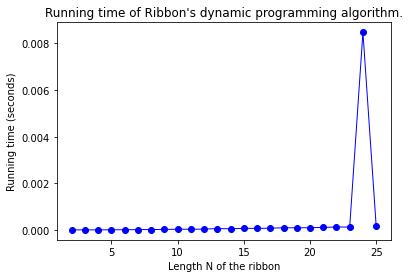

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ns,running_times, 'bo-', linewidth=1)
plt.title('Running time of Ribbon\'s dynamic programming algorithm.')
plt.xlabel('Length N of the ribbon')
plt.ylabel('Running time (seconds)')
plt.show()

We can see that the running times are less than a microsecond except in certain rare cases where the running time is one second approximately.

### Faster algorithm :

We can notice that for every N>4, the product is composed of several 3 instead of one term which can be 2, 3 or 4.

So, to get the maximum product, we can cut a portion of size 3 until the global size is greather than 4.

In [ ]:
def OptimalRibbon(N) :
    if N == 0 or N == 1 :
        return 0
    if N == 2 :
        return 1
    if N == 3 :
        return 2
    maxproduct = 1
    while N > 4 :
        maxproduct *= 3
        N -= 3
    return maxproduct*N

OptimalRibbon(8)

18

$$T(N) = \left\{
    \begin{array}{ll}
        c & \mbox{if N<=4} \\
        c*((N-1)/3) & \mbox{otherwise}
    \end{array}
\right.
\\
=> T(n) = O(N)$$

We found a faster algorithm, beacause it has a better running time than the dynamic programming version or the recursive version. So the algorithm of question 3 is not optimal.